<a href="https://colab.research.google.com/github/dev-kentayamada/machine-learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from IPython.display import HTML, display
#出力結果に対してフィルタリング・ページング
%load_ext google.colab.data_table
sns.set() #seabornのデフォルトスタイルを適用

##データを読み込む
- データの概要
  - Satisfaction(満足度)
   - 離散変数
   - 範囲(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
  - Loyalty(ロイヤリティ)
   - 直近一年間での購入履歴+ほかの要因
   - 標準化済み
   - 連続変数
   - 範囲(-2.5 ~ 2.5)

In [2]:
!gdown --id 1AApA-jqAFSXyZ80kgLQSk_gVkz6nq2Eh #Google driveからデータをダウンロード
data = pd.read_csv('3.12. Example.csv')
display(data)
display(data.describe(include='all'))
display(data.info())

Downloading...
From: https://drive.google.com/uc?id=1AApA-jqAFSXyZ80kgLQSk_gVkz6nq2Eh
To: /content/3.12. Example.csv
100% 283/283 [00:00<00:00, 542kB/s]


,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


None

##可視化

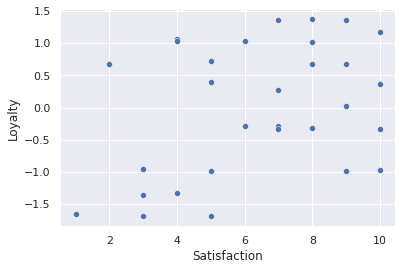

In [3]:
sns.scatterplot(data=data, x='Satisfaction', y='Loyalty')

## クラスター分析に使うデータの指定

In [4]:
Xs = []

###標準化していない

In [5]:
Xs.append(data)

###標準化した


In [6]:
Xs.append(preprocessing.scale(data))

##クラスター分析

###クラスター数を求める(WCSS)

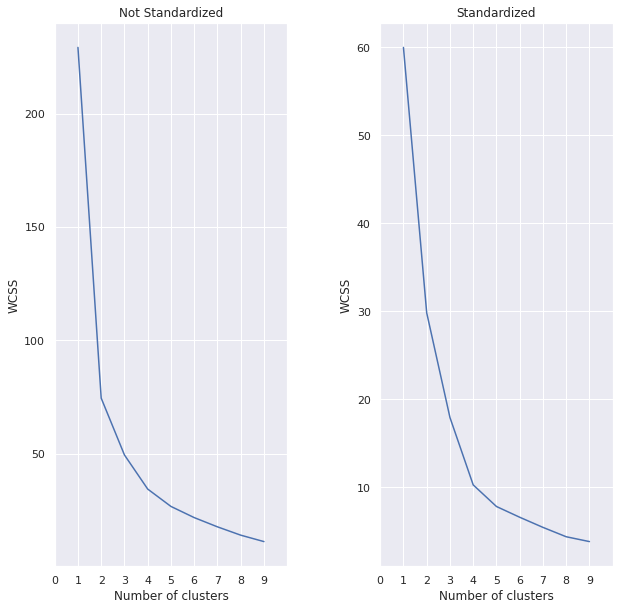

In [7]:
labels = ['Not Standardized', 'Standardized']
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for index, (X, label) in enumerate(zip(Xs, labels)):
  wcss = []
  num_cluter = range(1,10)

  for i in num_cluter:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
  
  #エルボー法
  ax[index].plot(num_cluter, wcss)
  ax[index].set_title(label)
  ax[index].set_xlabel('Number of clusters')
  ax[index].set_ylabel('WCSS')
  ax[index].set_xlim([0, 10])
  ax[index].xaxis.set_ticks(np.arange(0, 10, 1)) #y軸目盛間隔を調整

##結果

###標準化してない
- 想定したクラスターではない
- 満足度のみをもとにクラスタリングされたことが予想される(満足度の幅がロイヤリティより広いため)

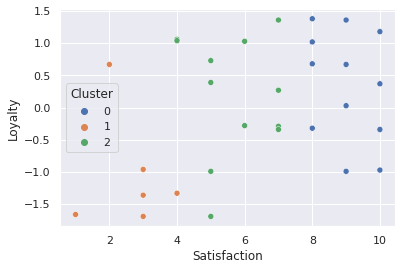

In [8]:
pred = KMeans(n_clusters=3).fit_predict(Xs[0])
data['Cluster'] = pred
sns.scatterplot(data=data, x='Satisfaction', y='Loyalty', hue="Cluster", palette="deep")

###標準化した

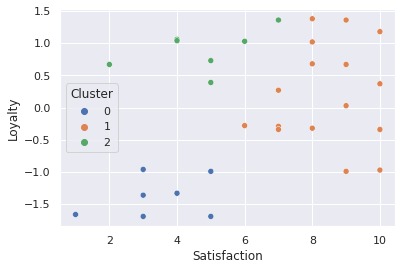

In [9]:
pred = KMeans(n_clusters=3).fit_predict(Xs[1])
data['Cluster'] = pred
sns.scatterplot(data=data, x='Satisfaction', y='Loyalty', hue="Cluster", palette="deep")